In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

In [3]:
pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [4]:
df_train.shape

(165034, 14)

In [5]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
df_train.drop(columns='id', inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


In [9]:
df_train.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
df_train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df_train.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [12]:
df_train.apply(pd.unique)

CustomerId         [15674932, 15749177, 15694510, 15741417, 15766...
Surname            [Okwudilichukwu, Okwudiliolisa, Hsueh, Kao, Ch...
CreditScore        [668, 627, 678, 581, 716, 588, 593, 676, 583, ...
Geography                                   [France, Spain, Germany]
Gender                                                [Male, Female]
Age                [33.0, 40.0, 34.0, 36.0, 30.0, 37.0, 43.0, 27....
Tenure                            [3, 1, 10, 2, 5, 4, 8, 6, 9, 7, 0]
Balance            [0.0, 148882.54, 131778.58, 144772.69, 138476....
NumOfProducts                                           [2, 1, 3, 4]
HasCrCard                                                 [1.0, 0.0]
IsActiveMember                                            [0.0, 1.0]
EstimatedSalary    [181449.97, 49503.5, 184866.69, 84560.88, 1506...
Exited                                                        [0, 1]
dtype: object

In [13]:
df_train.duplicated().sum()   # No duplicates

0

## EDA

In [14]:
num_cols = df_train.select_dtypes(include=np.number).columns
cat_cols = df_train.select_dtypes(include='O').columns

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


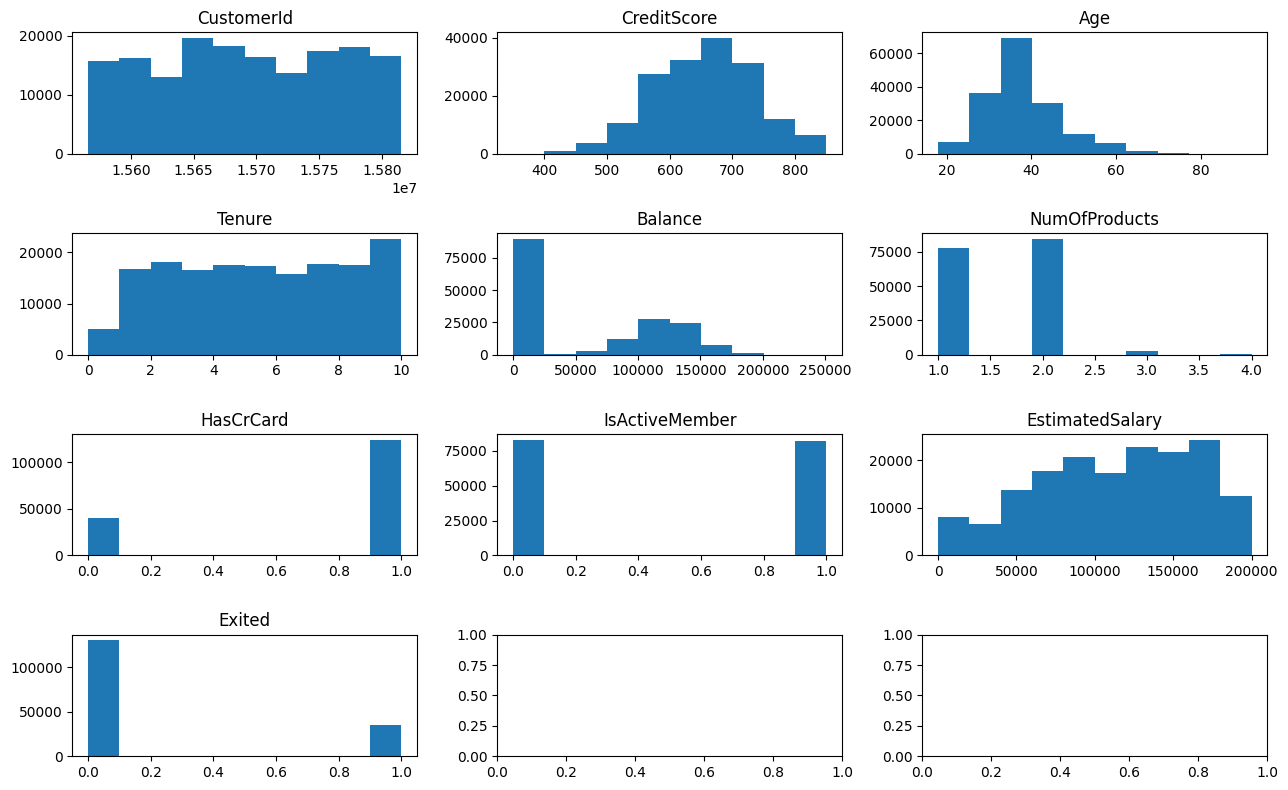

In [16]:
n = len(num_cols)
n_cols =  3
n_rows = n // n_cols + 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=(13,8))
for i in range(n):
    r = i // n_cols
    c = i % n_cols
    col_name = num_cols[i]
    ax[r,c].hist(df_train[col_name])
    ax[r,c].set_title(col_name)
    
plt.tight_layout()        
plt.show()

<Axes: >

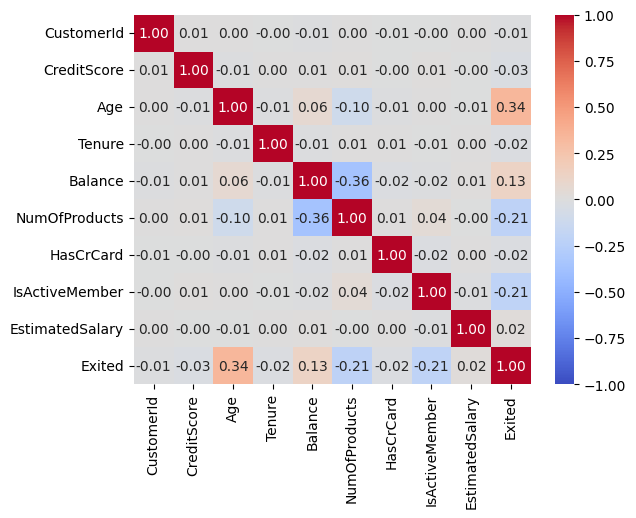

In [17]:
sns.heatmap(df_train[num_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')

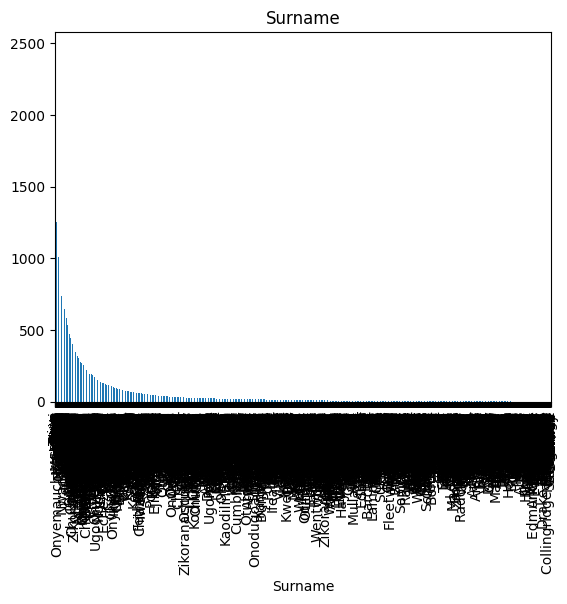

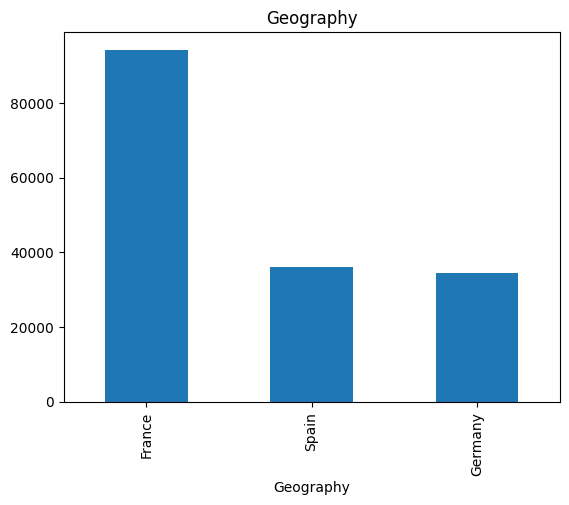

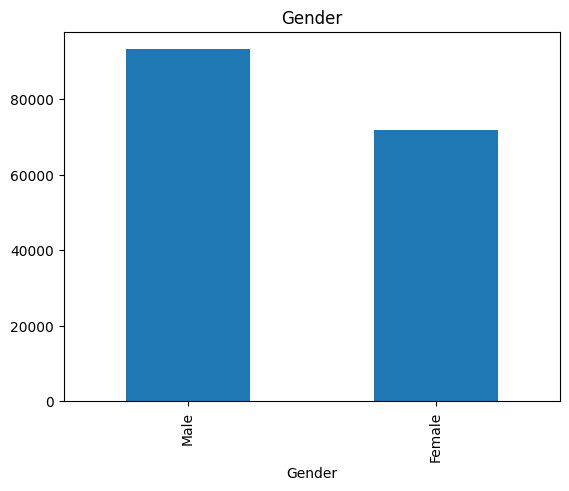

In [18]:
for col in cat_cols:
    df_train[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [19]:
gender_vs_exited_per = df_train.groupby(['Gender'],)['Exited'].value_counts()/df_train.shape[0]*100     
print(gender_vs_exited_per)            
# Only 12% of women and 9% of men closed their accounts
# percentage of men keeping their accounts is greater than that of women

Gender  Exited
Female  0         31.374747
        1         12.182338
Male    0         47.465371
        1          8.977544
Name: count, dtype: float64


In [20]:
geo_vs_exited_per = df_train.groupby(['Geography'],)['Exited'].value_counts()/df_train.shape[0]*100 
geo_vs_exited_per

# Most of account in France are kept using (48%)
# Spain has the lowest percentage of closed accounts

Geography  Exited
France     0         47.652605
           1          9.435631
Germany    0         13.022771
           1          7.946241
Spain      0         18.164742
           1          3.778009
Name: count, dtype: float64

In [21]:
df_train['Surname'].value_counts().nlargest(15)

Surname
Hsia        2456
T'ien       2282
Hs?         1611
Kao         1577
Maclean     1577
Ts'ui       1567
P'eng       1503
H?          1420
Hsueh       1306
Shih        1251
Ch'ang      1229
Ch'iu       1199
Mazzanti    1192
Tuan        1164
Fanucci     1139
Name: count, dtype: int64

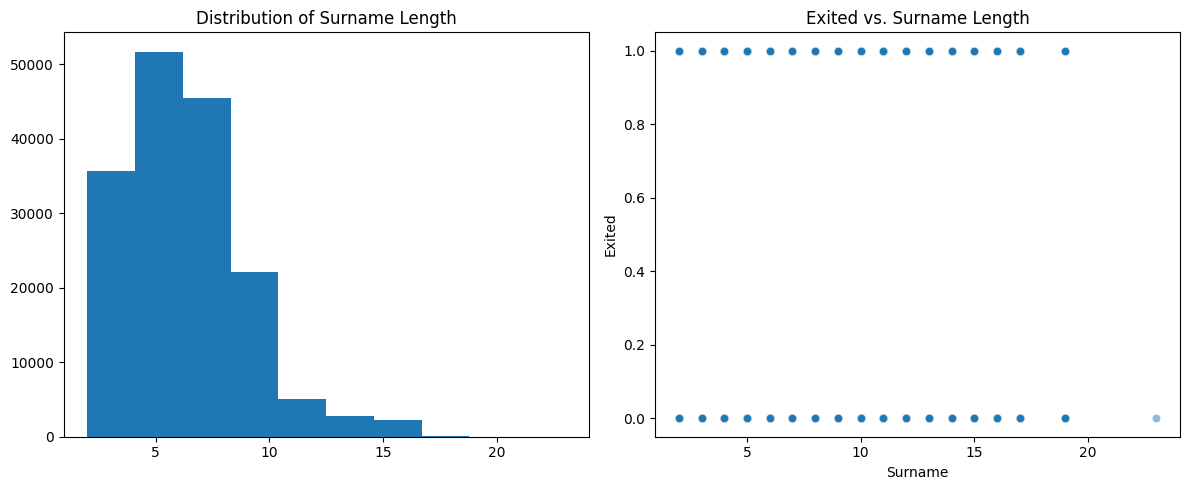

In [22]:
surname_len = df_train['Surname'].str.len()
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=surname_len, y=df_train['Exited'], alpha=0.5, axes=ax[1])
ax[0].hist(surname_len)
ax[0].set_title('Distribution of Surname Length')
ax[1].set_title('Exited vs. Surname Length')
plt.tight_layout()
plt.show()

In [23]:
np.corrcoef(surname_len, df_train['Exited'])

array([[1.        , 0.00482154],
       [0.00482154, 1.        ]])

<Axes: >

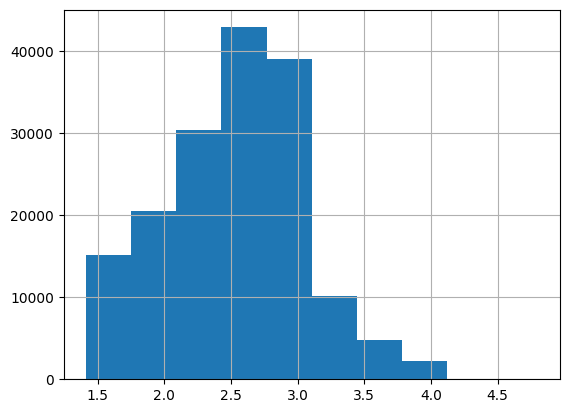

In [24]:
np.sqrt(surname_len).hist() # Distribution of the square root of surname length look more normalb

<Axes: >

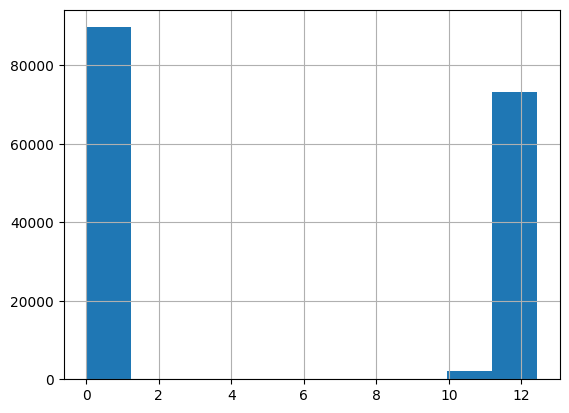

In [25]:
np.log(df_train['Balance'] + 1).hist()

In [26]:
hasBalance = df_train.query('Balance != 0')
noBalance = df_train.query('Balance == 0')
print("Has Balance")
print(hasBalance.Exited.value_counts(normalize=True)*100)
print('-----------------')
print('Has No Balance')
print(noBalance.Exited.value_counts(normalize=True)*100)

Has Balance
Exited
0    72.900804
1    27.099196
Name: proportion, dtype: float64
-----------------
Has No Balance
Exited
0    83.834553
1    16.165447
Name: proportion, dtype: float64


## Preprocessing

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

seed = 42

In [28]:
def scale_and_encode(df_train, df_test):
    num_cols = [col for col in df_train.select_dtypes(include=np.number).columns if df_train[col].nunique() != 2]
    cat_cols = df_train.select_dtypes(include='O').columns
    
    encoder = OneHotEncoder(handle_unknown='ignore')
    scaler = StandardScaler()
    
    df_train_scaled = df_train.copy()
    df_test_scaled = df_test.copy()
    
    # scaling the numerical variables but not binary variables
    df_train_scaled[num_cols] = scaler.fit_transform(df_train_scaled[num_cols])
    df_test_scaled[num_cols]  = scaler.transform(df_test_scaled[num_cols])

    # encoding the categorical data
    df_train_cat_scaled = encoder.fit_transform(df_train_scaled[cat_cols])
    df_test_cat_scaled = encoder.transform(df_test_scaled[cat_cols])

    df_train_cat_scaled_df = pd.DataFrame(df_train_cat_scaled.toarray(), columns=encoder.get_feature_names_out(), index=df_train.index)
    df_test_cat_scaled_df = pd.DataFrame(df_test_cat_scaled.toarray(), columns=encoder.get_feature_names_out(), index=df_test.index)
    
    # Combine OneHotEncoding data with the entire data
    df_train_scaled = pd.concat([df_train_scaled, df_train_cat_scaled_df], axis=1).drop(columns=cat_cols)
    df_test_scaled = pd.concat([df_test_scaled, df_test_cat_scaled_df], axis=1).drop(columns=cat_cols)
    
    return df_train_scaled, df_test_scaled

In [29]:
X = df_train.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = df_train['Exited'].values


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed)

X_train_scaled, X_val_scaled = scale_and_encode(X_train, X_val)

## Baseline Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [31]:
def cross_val_performance(model_list, x_train=X_train_scaled, y_train=y_train, scoring='roc_auc', verbose=True):
    model_names = []
    avg_scores = []
    std_scores = []
    for model_name, model_obj in model_list:
        scores = cross_val_score(model_obj, x_train, y_train, cv=5, scoring=scoring)
        avg_score = np.mean(scores)
        std_score = np.std(scores)
        
        if verbose:
            print(f'>>>{model_name.upper()}:')
            print(f'5-fold scores: {scores}')        
            print(f'Average AUC: {avg_score} --- St dev: {std_score}')
            print('-'*60)        
            
        model_names.append(model_name)
        avg_scores.append(avg_score)
        std_scores.append(std_score)
        
    ordered_scores_df = pd.DataFrame({'Model':model_names, 'Avg_AUC':avg_scores, 'Std_AUC':std_scores}).sort_values(['Avg_AUC', 'Std_AUC'], ascending=False)
    return ordered_scores_df


In [32]:
def scores_barplot(scores_df):
    plt.figure(figsize=(13,7))
    plt.subplot(121)
    plt.bar(scores_df.Model, scores_df.Avg_AUC)
    plt.xticks(rotation=45)
    plt.title('Average of 5 ROC AUC Scores')
    
    plt.subplot(122)
    plt.bar(scores_df.Model, scores_df.Std_AUC)
    plt.xticks(rotation=45)
    plt.title('Std. Dev of 5 ROC AUC Scores')
    plt.tight_layout()
    plt.show()

In [33]:

models = [('logreg', LogisticRegression(random_state=seed)),
          ('ada', AdaBoostClassifier(random_state=seed)),
          ('knn', KNeighborsClassifier()),
          ('rf', RandomForestClassifier(random_state=seed)),
          ('gb', GradientBoostingClassifier(random_state=seed)),
          ('gnb', GaussianNB()),
          ('xgb', XGBClassifier(random_state=seed)),
          ('lgb', LGBMClassifier(random_state=seed)),
          ('cb', CatBoostClassifier(random_state=seed, verbose=False,))]

In [34]:
df_scores = cross_val_performance(models)

>>>LOGREG:
5-fold scores: [0.82114335 0.81530293 0.81817209 0.81647576 0.82200233]
Average AUC: 0.8186192897052604 --- St dev: 0.002592633874700136
------------------------------------------------------------
>>>ADA:
5-fold scores: [0.87970606 0.8778693  0.879495   0.88218185 0.88192533]
Average AUC: 0.8802355073905858 --- St dev: 0.0016168712514425811
------------------------------------------------------------
>>>KNN:
5-fold scores: [0.8246981  0.82487564 0.82369861 0.83021057 0.82559417]
Average AUC: 0.8258154191979166 --- St dev: 0.002279420107631253
------------------------------------------------------------
>>>RF:
5-fold scores: [0.87159355 0.87080169 0.87124847 0.87654789 0.87386727]
Average AUC: 0.8728117717707731 --- St dev: 0.002146675295072465
------------------------------------------------------------
>>>GB:
5-fold scores: [0.88764829 0.8869513  0.8870892  0.89007375 0.89013098]
Average AUC: 0.8883787025934934 --- St dev: 0.0014267059007764121
----------------------------

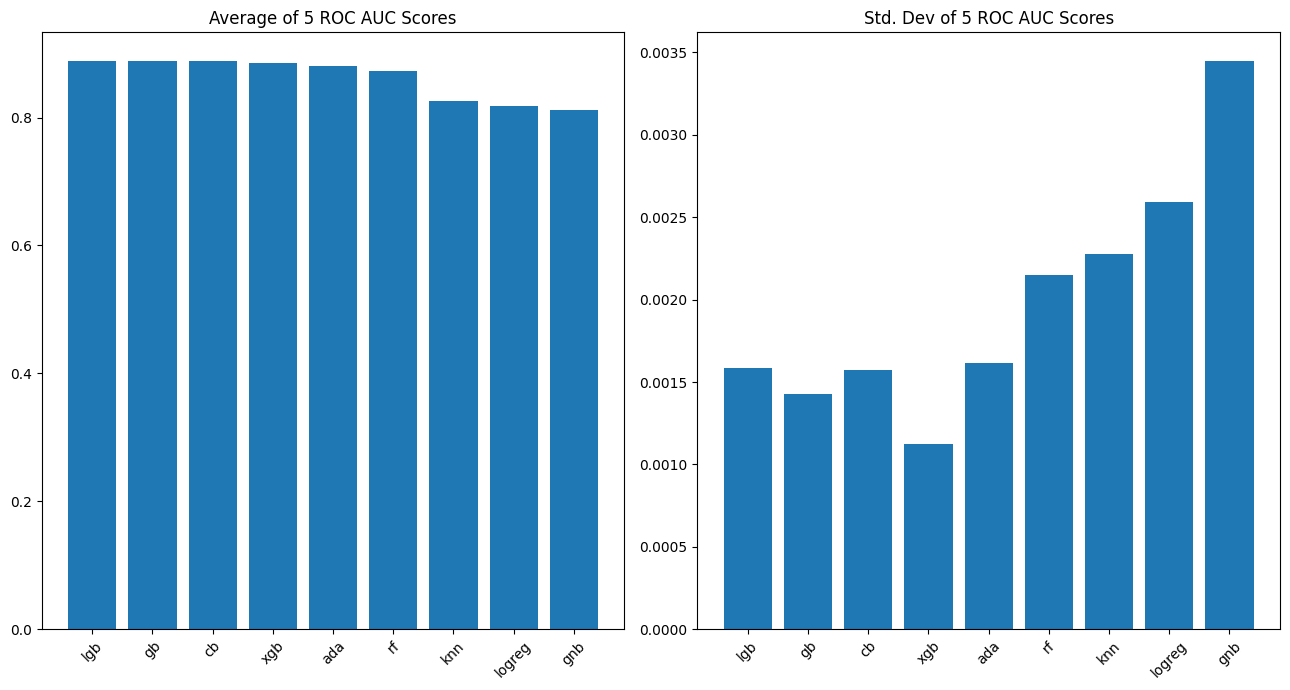

In [35]:
scores_barplot(df_scores)

## Feature Engineering 

In [36]:
def perform_feature_engineering(data):
    df = data.copy()
    # Age groups
    age_bins = [0, 18, 30, 40, 50, 60,np.inf]
    df['AgeGroup'] = pd.cut(df.Age, bins=age_bins, right=False, labels=False)
    
    # Balance categories
    balance_bins = [-np.inf, 10000, 40000, 70000, 100000, np.inf]
    df['BalanceCat'] = pd.cut(df.Balance, bins=balance_bins, right=False, labels=False)
    
    # Credit score catgories
    credit_score_bins = [0,500, 600, 700, 800, np.inf]
    df['CreScoreCat'] = pd.cut(df.CreditScore, bins=credit_score_bins, right=False, labels=False)
    
    # Surname length
    df['SurnameLen'] = df.Surname.str.len()
    
    # Total Products over Years
    df['TotalProducts'] = df_train.Tenure * df_train.NumOfProducts
    
    return df

In [37]:
new_df = perform_feature_engineering(df_train)
print(new_df.shape)
new_df.head()

(165034, 18)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceCat,CreScoreCat,SurnameLen,TotalProducts
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,2,0,2,14,6
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,2,0,2,13,2
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,3,0,2,5,20
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,2,4,1,3,2
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,0,3,9,10


In [38]:
new_X = new_df.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = df_train['Exited'].values


new_X_train, new_X_val, y_train, y_val = train_test_split(new_X, y, stratify=y, random_state=seed)

new_X_train_scaled, new_X_val_scaled = scale_and_encode(new_X_train, new_X_val)

## Model Training with Feature Engineered Data 

In [39]:
new_scores_df = cross_val_performance(models, x_train=new_X_train_scaled)

>>>LOGREG:
5-fold scores: [0.82093957 0.81556172 0.8184666  0.81650781 0.82222051]
Average AUC: 0.8187392434995143 --- St dev: 0.0025342040975618115
------------------------------------------------------------
>>>ADA:
5-fold scores: [0.87994332 0.87794312 0.87922997 0.88242736 0.8819306 ]
Average AUC: 0.8802948737190913 --- St dev: 0.0016740021926239395
------------------------------------------------------------
>>>KNN:
5-fold scores: [0.8228387  0.81963423 0.82025602 0.82726592 0.81919395]
Average AUC: 0.8218377657955104 --- St dev: 0.0029937936708905144
------------------------------------------------------------
>>>RF:
5-fold scores: [0.87322021 0.87210943 0.87274484 0.87737802 0.87507826]
Average AUC: 0.8741061530223359 --- St dev: 0.001911807590150368
------------------------------------------------------------
>>>GB:
5-fold scores: [0.88769252 0.88716424 0.88704617 0.89011207 0.89011818]
Average AUC: 0.8884266354066146 --- St dev: 0.0013957257512004341
--------------------------

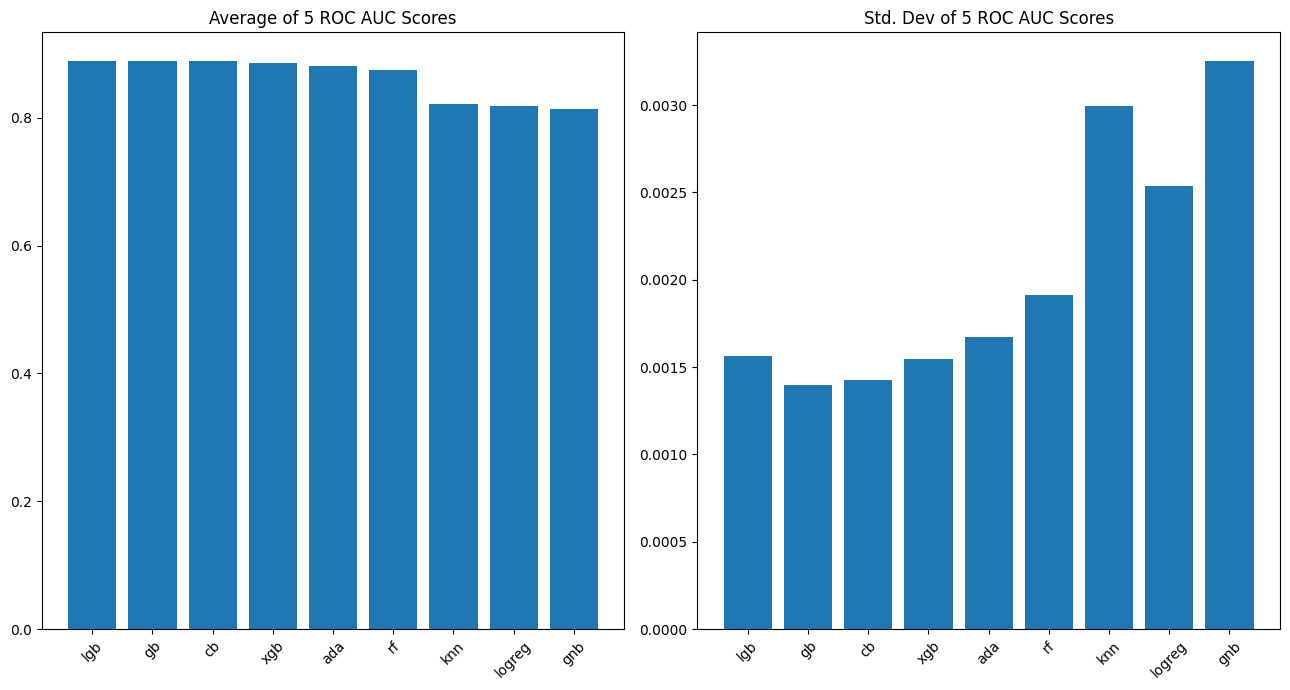

In [40]:
scores_barplot(new_scores_df)

## Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [42]:
models = [('logreg', LogisticRegression(random_state=seed)),
          ('ada', AdaBoostClassifier(random_state=seed)),
          ('knn', KNeighborsClassifier()),
          ('rf', RandomForestClassifier(random_state=seed)),
          ('gb', GradientBoostingClassifier(random_state=seed)),
          ('gnb', GaussianNB()),
          ('xgb', XGBClassifier(random_state=seed)),
          ('lgb', LGBMClassifier(random_state=seed)),
          ('cb', CatBoostClassifier(random_state=seed, verbose=False,))]

## LightGBM

In [43]:
lgbParams = {'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50]}

In [44]:
lgb = LGBMClassifier(random_state=seed)
lgb_cv = RandomizedSearchCV(lgb, param_distributions=lgbParams, cv=5, scoring='roc_auc')
lgb_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ee6bc4670>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6eec64aec0>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ee6baa350>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20,
                                                       50],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ee6bc4430>},
                   scoring='roc_auc')

In [45]:
lgb_cv.best_score_

0.8895703321531485

## Gradient Boosting

In [46]:
gbParams = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100]
    }

In [47]:
gb = GradientBoostingClassifier(random_state=seed)
gb_cv = RandomizedSearchCV(gb, param_distributions=gbParams, cv=5, scoring='roc_auc')
gb_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'n_estimators': [10, 50, 100],
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                                                      0.9, 0.95, 1.0]},
                   scoring='roc_auc')

In [48]:
gb_cv.best_score_

0.8431547021126928

## Cat Boost

In [49]:
cbParams = {'iterations': [100, 200, 300],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
         }

In [50]:
cb = CatBoostClassifier(random_state=seed, verbose=False,)
cb_cv = RandomizedSearchCV(cb, param_distributions=cbParams, cv=5, scoring='roc_auc')
cb_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f6ee77064d0>,
                   param_distributions={'depth': [4, 5, 6],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                                        'leaf_estimation_iterations': [10],
                                        'loss_function': ['Logloss',
                                                          'CrossEntropy']},
                   scoring='roc_auc')

In [51]:
cb_cv.best_score_

0.8888463542664089

## XGBoost

In [52]:
xgbParams = {'max_depth': [4, 6, None],
              'min_child_weight': [2, 3, 5],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

In [53]:
xgb = XGBClassifier(random_state=seed)
xgb_cv = RandomizedSearchCV(xgb, param_distributions=xgbParams, cv=5, scoring='roc_auc')
xgb_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.7],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [4, 6, None],
                                        'min_child_weight': [2, 3, 5],
                                        'n_estimators': [5, 10, 15],
                                        'subsample': [0.7]},
                   scoring='roc_auc')

In [54]:
xgb_cv.best_score_

0.8870961289365716

## AdaBoost

In [55]:
adaParams = {
    'n_estimators': [5, 10, 20, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [56]:
ada = AdaBoostClassifier(random_state=seed)
ada_cv = RandomizedSearchCV(ada, param_distributions=adaParams, cv=5, scoring='roc_auc')
ada_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'n_estimators': [5, 10, 20, 50]},
                   scoring='roc_auc')

In [57]:
ada_cv.best_score_

0.8692412213194777

## Random Forest

In [58]:
rfParams = {'max_depth': [3,5], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,],
             'n_estimators': [100, 200],
             }

In [59]:
rf = RandomForestClassifier(random_state=seed)
rf_cv = RandomizedSearchCV(rf, param_distributions=rfParams, cv=5, scoring='roc_auc')
rf_cv.fit(new_X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc')

In [60]:
rf_cv.best_score_

0.8773240039682471

## Evaluate on the validation set

In [61]:
lgb_score = roc_auc_score(y_val, lgb_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])
gb_score = roc_auc_score(y_val, gb_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])
cb_score = roc_auc_score(y_val, cb_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])
xgb_score = roc_auc_score(y_val, xgb_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])
ada_score = roc_auc_score(y_val, ada_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])
rf_score = roc_auc_score(y_val, rf_cv.best_estimator_.predict_proba(new_X_val_scaled)[:, 1])

In [62]:
print(f'lgb: {lgb_score}')
print(f'gb: {gb_score}')
print(f'cb: {cb_score}')
print(f'xgb: {xgb_score}')
print(f'ada: {ada_score}')
print(f'rf: {rf_score}')


lgb: 0.8897685586184318
gb: 0.8413150612950283
cb: 0.8891025338320899
xgb: 0.8877996414301845
ada: 0.8681365402136367
rf: 0.8766283267477919


# Predict on Test Set

In [63]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [64]:
df_test.duplicated().sum()

0

In [65]:
df_test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [66]:
new_df_test = perform_feature_engineering(df_test)
new_df_train = perform_feature_engineering(df_train)
new_df_test.head()

new_df_test.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)
new_df_train.drop(columns=['CustomerId', 'Surname', 'Exited'], inplace=True)

In [67]:
_ , df_test_scaled = scale_and_encode(new_df_train, new_df_test)
df_test_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,BalanceCat,CreScoreCat,SurnameLen,TotalProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.879546,-1.705829,-1.076334,-0.883163,0.814298,0.0,1.0,0.962404,-1.482473,-0.904342,-1.204961,0.557259,-0.337614,1.0,0.0,0.0,1.0,0.0
1,0.331393,0.888007,-1.076334,-0.883163,-1.013348,1.0,0.0,-0.795852,0.707678,-0.904342,-0.062110,-0.972809,-1.081594,1.0,0.0,0.0,1.0,0.0
2,-0.005672,-0.465299,0.705467,-0.883163,0.814298,1.0,0.0,0.523083,-0.387398,-0.904342,-0.062110,-1.737844,2.266316,1.0,0.0,0.0,1.0,0.0
3,0.306425,-0.239748,1.061827,-0.883163,-1.013348,1.0,0.0,0.026977,-0.387398,-0.904342,-0.062110,0.939776,-1.081594,1.0,0.0,0.0,0.0,1.0
4,1.192783,-0.014197,1.774548,1.047249,-1.013348,1.0,0.0,0.533997,-0.387398,1.188109,1.080741,0.174742,0.406366,0.0,1.0,0.0,0.0,1.0


In [68]:
df_test_scaled.shape

(110023, 18)

In [69]:
def test_perform(estimator, X_test=df_test_scaled):
    y_pred_prob = estimator.predict_proba(X_test)[:, 1]
    return y_pred_prob

In [70]:
lgb_pred = test_perform(lgb_cv.best_estimator_)
cb_pred = test_perform(cb_cv.best_estimator_)
xgb_pred = test_perform(xgb_cv.best_estimator_)
ada_pred = test_perform(ada_cv.best_estimator_)
rf_pred = test_perform(rf_cv.best_estimator_)

# Submissions

In [71]:
ensemble1 = (lgb_pred + cb_pred + xgb_pred + ada_pred + rf_pred)/5
sub1 = pd.DataFrame({'id':df_test.id, 'Exited':ensemble1})
sub1.to_csv('submission_1.csv', index=False)

In [72]:
ensemble2 = (lgb_pred + cb_pred + xgb_pred)/3

sub2 = pd.DataFrame({'id':df_test.id, 'Exited':ensemble2})
sub2.to_csv('submission_2.csv', index=False)


In [73]:
sub3 = pd.DataFrame({'id':df_test.id, 'Exited':lgb_pred})
sub3.to_csv('submission_3.csv', index=False)

sub4 = pd.DataFrame({'id':df_test.id, 'Exited':xgb_pred})
sub4.to_csv('submission_4.csv', index=False)

sub5 = pd.DataFrame({'id':df_test.id, 'Exited':cb_pred})
sub5.to_csv('submission_5.csv', index=False)

sub6 = pd.DataFrame({'id':df_test.id, 'Exited':rf_pred})
sub6.to_csv('submission_6.csv', index=False)